# AAI-500 Final Team Project - Group 7
#### Members:
#### Suman Senapati
#### Ananya Chandraker
#### Krishnasamy Sethuram

We have chosen to work on AIDS VIRUS Infection prediction dataset which encapsulates a broad spectrum of clinical and demographical variables related to AIDS patients.

#### Title of the Project: Statistical Analysis and Predictive Modeling for AIDS Virus Infection

####  Short Description of the Project: 
   This project performs a Statistical Analysis and Predictive Modeling for AIDS Virus Infection

####  Objectives of the Project: 
1) To develop a predictive model for AIDS virus Infection using the clinical data.
2) We aim to identify the key risk factors associated with the HIV infection and asses their impact
   through probability and statistical analysis. 
3) We aim to perform Descriptive statistics like calculation of mean, median, mode, variance and 
   standard deviation for numerical variables to gain insights into the central tendency and dispersion 
   of numerical variables such as age and on clinical data to understand characteristics of population. 
4) We aim to perform Inferential statistics like perform Hypothesis testing and chi-squared tests
   to compare means between different groups (for example: infected vs non-infected patients)
   and derive conclusions about the broader population based on the sample data
5) We aim to perform Predictive modeling to establish the relationship between predictors 
   like (clinical results) and the viral infection using logistic regression analysis, correlation analysis.
   This would predict the likelihood of HIV infection based on various predictors
   
####  Details of Dataset:  

   This is a AIDS classification dataset which encapsulates a broad spectrum of clinical and 
   Demographical variables related to AIDS patients.
   
   Data Source: - OpenML- AIDS_Virus_Infection_Prediction (https://www.openml.org/search?type=data&status=active&id=46076&sort=runs)
   
   Number of Variables: 23
   
   Number of Instances: 50000
   
   Size of dataset: 5.35 MB


## Importing Libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

## Importing Dataset

In [7]:
#Covid 19 dataset from OpenML
data = fetch_openml(data_id=46076, as_frame=True, parser = 'auto')
df = data.frame # Our original dataset stored in a dataframe 'df'

## Exploratory Data Analysis

In [6]:
#Checking the shape (rows and columns) of the dataset
df.shape

(50000, 23)

In [8]:
#Checking datatypes of the columns
df.dtypes

time        float64
trt         float64
age         float64
wtkg        float64
hemo        float64
homo        float64
drugs       float64
karnof      float64
oprior      float64
z30         float64
preanti     float64
race        float64
gender      float64
str2        float64
strat       float64
symptom     float64
treat       float64
offtrt      float64
cd40        float64
cd420       float64
cd80        float64
cd820       float64
infected    float64
dtype: object

In [9]:
#Let us have a look at a sample from the original dataset to understand what we are dealing with
df.head(5)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073.0,1.0,37.0,79.46339,0.0,1.0,0.0,100.0,0.0,1.0,...,1.0,2.0,0.0,1.0,0.0,322.0,469.0,882.0,754.0,1.0
1,324.0,0.0,33.0,73.02314,0.0,1.0,0.0,90.0,0.0,1.0,...,1.0,3.0,1.0,1.0,1.0,168.0,575.0,1035.0,1525.0,1.0
2,495.0,1.0,43.0,69.47793,0.0,1.0,0.0,100.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,377.0,333.0,1147.0,1088.0,1.0
3,1201.0,3.0,42.0,89.15934,0.0,1.0,0.0,100.0,1.0,1.0,...,1.0,3.0,0.0,0.0,0.0,238.0,324.0,775.0,1019.0,1.0
4,934.0,0.0,37.0,137.46581,0.0,1.0,0.0,100.0,0.0,0.0,...,0.0,3.0,0.0,0.0,1.0,500.0,443.0,1601.0,849.0,0.0


In [10]:
# Computing basic statistical parameters for all the numerical data in the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,50000.0,877.369780,307.288688,66.00000,542.000000,1045.000000,1136.000000,1231.00000
trt,50000.0,1.384800,1.233272,0.00000,0.000000,1.000000,3.000000,3.00000
age,50000.0,34.164020,7.091152,12.00000,29.000000,34.000000,39.000000,68.00000
wtkg,50000.0,75.861991,12.028730,42.36162,68.253682,74.054115,81.142185,149.83087
hemo,50000.0,0.033480,0.179888,0.00000,0.000000,0.000000,0.000000,1.00000
homo,50000.0,0.653540,0.475847,0.00000,0.000000,1.000000,1.000000,1.00000
drugs,50000.0,0.132220,0.338733,0.00000,0.000000,0.000000,0.000000,1.00000
karnof,50000.0,96.831560,5.091788,76.00000,90.000000,100.000000,100.000000,100.00000
oprior,50000.0,0.042300,0.201275,0.00000,0.000000,0.000000,0.000000,1.00000
z30,50000.0,0.640880,0.479747,0.00000,0.000000,1.000000,1.000000,1.00000


In [11]:
#Checking missing data in dataset
df.isna().sum().sum()

0

#### Data Cleaning

In [12]:
#Let's look at the distribution of blank/NaN in the dataset
for x in df.columns:
    blank = df[x].isna().sum().sum()
    if blank>0:
        print(f'No. of blanks in {x} = {blank} which is having datatype {df[x].dtypes}')

Since the missing data is concentrated in only one column, and numbers are very less compared to the size of the dataset, they can be safely dropped

In [13]:
df.dropna(inplace=True)

### Segregation of Dataset into Numerical and Categorical data

In [14]:
num_df = df.select_dtypes(include=(np.number))
cat_df = df.select_dtypes(exclude=(np.number))

In [72]:
#Let's check the shape of the two constituting dataframes
print(f'No. of Columns of Numerical dataset: {num_df.shape[1]} and Categorical dataset: {cat_df.shape[1]}')

No. of Columns of Numerical dataset: 23 and Categorical dataset: 0


#### Univariate analsysis

Let's have a look at the distribution of the result (Percent of Infected)

C:\Users\sekrishn\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


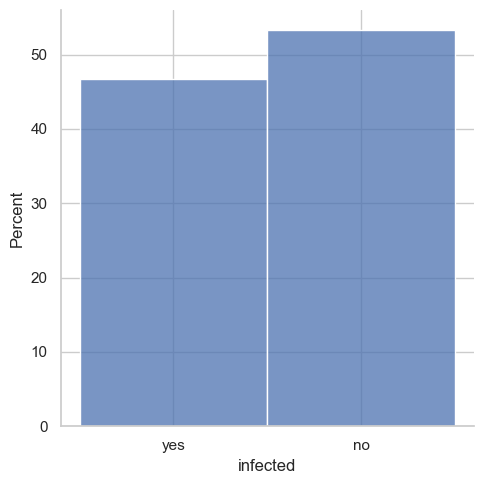

In [71]:
sn.displot(df['infected'], bins=2, stat='percent')
plt.show()


There's a minor unbalanced distribution of the output variable which can be taken care of during model selection or through class weights

#### Bivariate Analysis

Basic Statistics:
              age        cd40  infected_numeric
count  15.000000   15.000000         15.000000
mean   38.333333  508.000000          0.466667
std    13.552368  121.784353          0.516398
min    22.000000  300.000000          0.000000
25%    28.500000  425.000000          0.000000
50%    33.000000  520.000000          0.000000
75%    47.500000  595.000000          1.000000
max    65.000000  700.000000          1.000000

Mode:


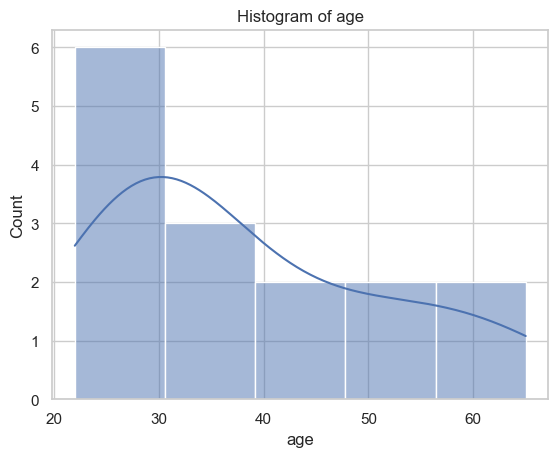

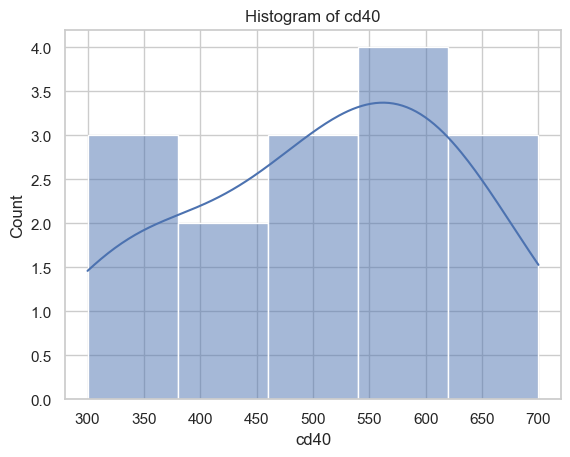

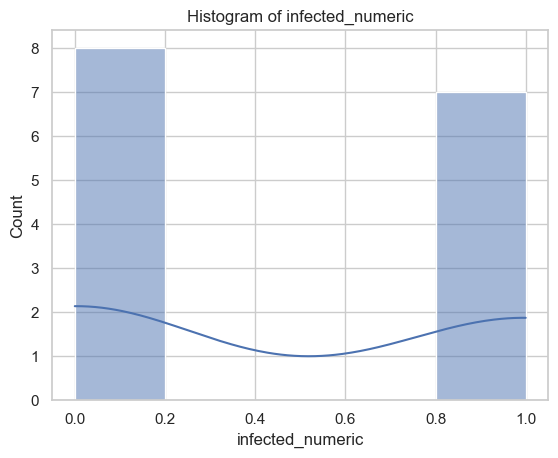

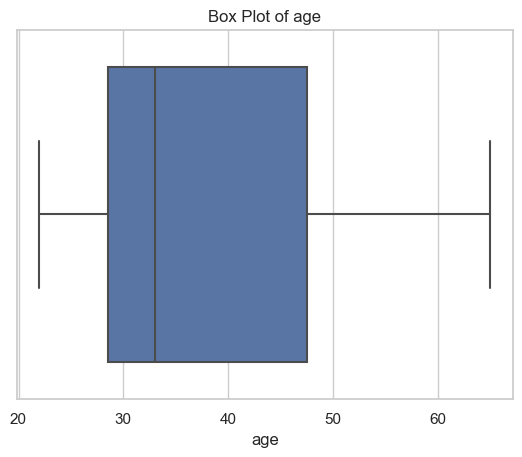

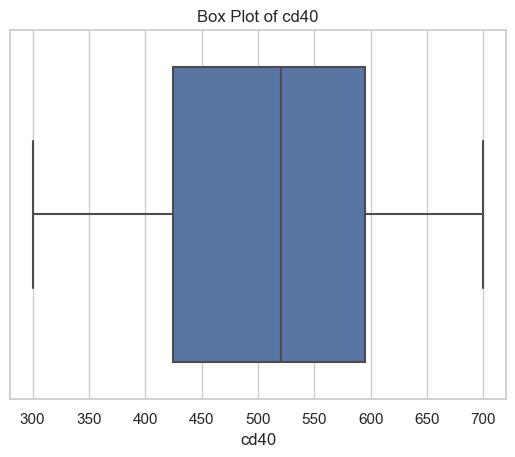

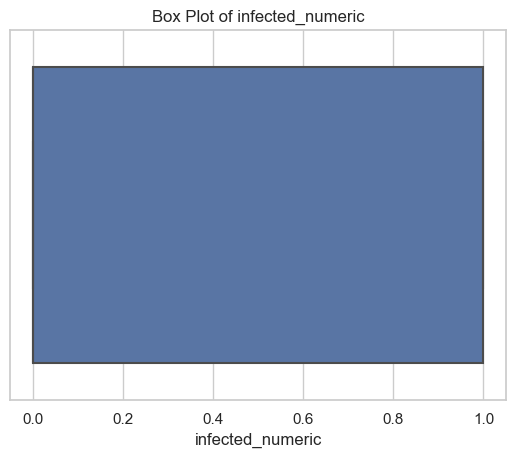

  infected        mean  median         std
0       no  520.000000   525.0  103.094963
1      yes  494.285714   520.0  147.632104


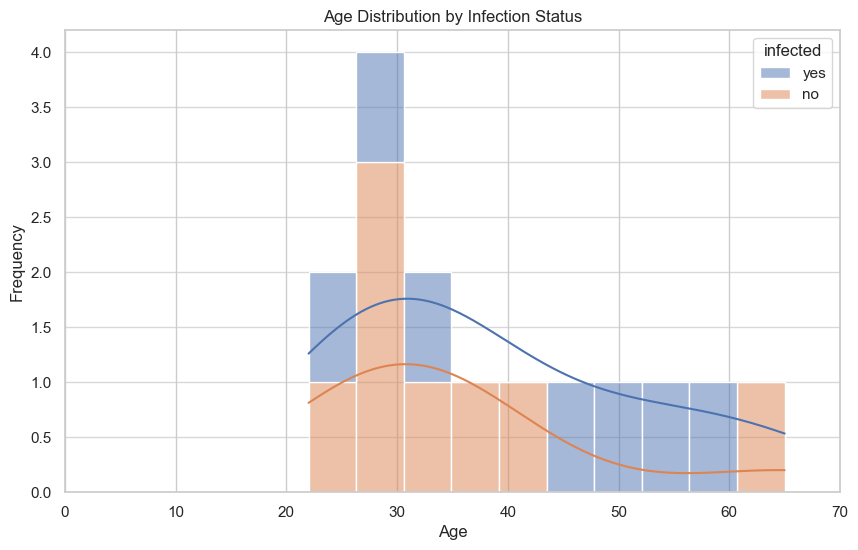

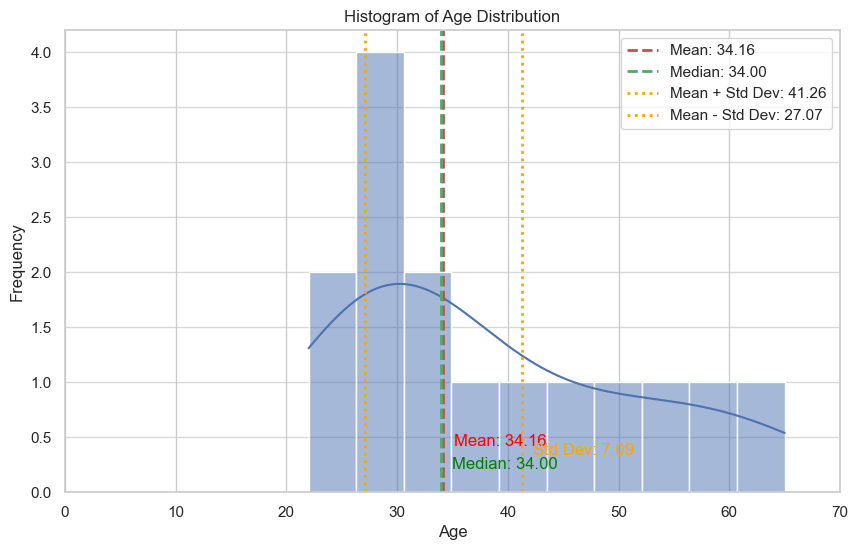

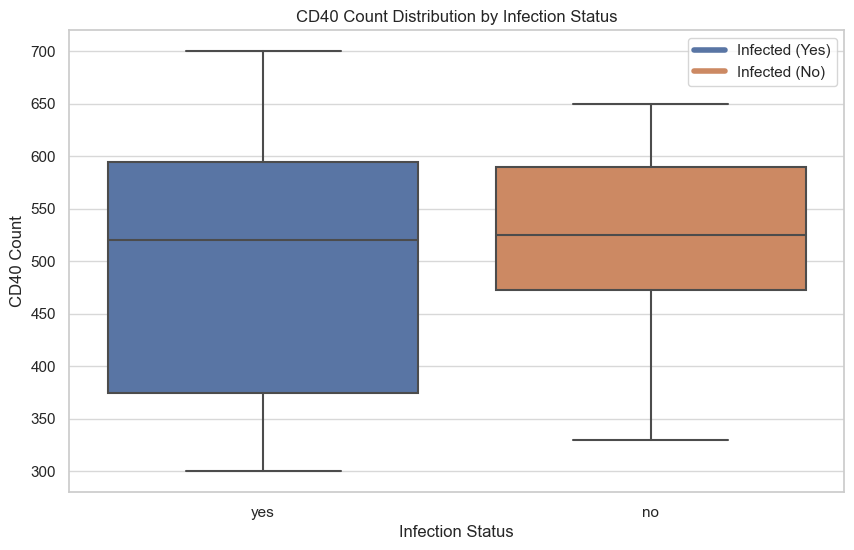

In [57]:
# Calculate basic statistics
statistics = df.describe()

# Calculate mode
mode = df.mode().iloc

# Print basic statistics
print("Basic Statistics:\n", statistics)
print("\nMode:\n", mode)

# Visualize the data
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Histograms
for column in numeric_columns:
    plt.figure()
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

# Box Plots
for column in numeric_columns:
    plt.figure()
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.show()
    
# Create a histogram for age distribution by infection status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='infected', bins=10, kde=True, multiple='stack')
plt.title('Age Distribution by Infection Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0, 70)  # Adjust limits based on your data range
plt.grid(axis='y', alpha=0.75)

# Create a histogram for the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=10, kde=True)

# Add vertical lines for mean, median, and standard deviation
plt.axvline(mean_age, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_age:.2f}')
plt.axvline(mean_age + std_dev_age, color='orange', linestyle='dotted', linewidth=2, label=f'Mean + Std Dev: {mean_age + std_dev_age:.2f}')
plt.axvline(mean_age - std_dev_age, color='orange', linestyle='dotted', linewidth=2, label=f'Mean - Std Dev: {mean_age - std_dev_age:.2f}')

# Annotate mean, median and standard deviation on the plot
plt.text(mean_age + 1, plt.ylim()[1] * 0.1, f'Mean: {mean_age:.2f}', color='red')
plt.text(median_age + 1, plt.ylim()[1] * 0.05, f'Median: {median_age:.2f}', color='green')
plt.text(mean_age + std_dev_age + 1, plt.ylim()[1] * 0.08, f'Std Dev: {std_dev_age:.2f}', color='orange')

# Add titles and labels
plt.title('Histogram of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0, 70)  # Adjust limits based on your data range
plt.grid(axis='y', alpha=0.75)
plt.legend()

# Calculate descriptive statistics for CD4 counts by infection status
stats = df.groupby('infected')['cd40'].agg(['mean', 'median', 'std']).reset_index()

# Print the statistics
print(stats)

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a box plot for CD80 counts by infection status
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x='infected', y='cd40', data=df)

# Add titles and labels
plt.title('CD40 Count Distribution by Infection Status')
plt.xlabel('Infection Status')
plt.ylabel('CD40 Count')
plt.grid(axis='y', alpha=0.75)

# Create a custom legend with matching colors
handles = []
labels = ['Infected (Yes)', 'Infected (No)']
for i in range(len(labels)):
    handles.append(plt.Line2D([0], [0], color=box_plot.patches[i].get_facecolor(), lw=4))

# Add the legend to the plot
plt.legend(handles=handles, labels=labels)

# Show the plot
plt.show()